In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm 
import nibabel as nib
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import layers


In [2]:
num_classes = 2
img_rows,img_cols = 200,200
batch_size = 128

In [3]:
train_data_dir = '/content/drive/MyDrive/train (2)'
validation_data_dir = '/content/drive/MyDrive/val (1)'
test_data_dir = '/content/drive/MyDrive/test (2)'

In [4]:
'''train_datagen = ImageDataGenerator(
					horizontal_flip=True,
					fill_mode='nearest')'''
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         validation_split = 0.2, horizontal_flip=True,
                                        )
validation_datagen = ImageDataGenerator(validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_data_dir,
                                                    target_size = (img_rows,img_cols),
                                                    batch_size = 128,
                                                    class_mode = "binary",
                                                    subset = "training"
                                                   )

Found 4173 images belonging to 2 classes.


In [6]:
validation_generator = validation_datagen.flow_from_directory( directory = test_data_dir,
                                                              target_size = (img_rows,img_cols),
                                                              batch_size = 128,
                                                              class_mode = "binary",
                                                              subset = "validation"
                                                             )

Found 124 images belonging to 2 classes.


(1434, 1810, 3)


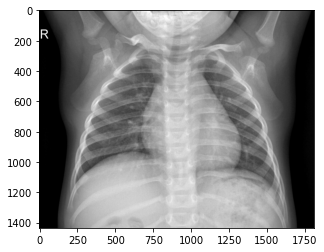

In [7]:
import cv2
img=cv2.imread('/content/drive/MyDrive/train (2)/NORMAL/IM-0119-0001.jpeg')
plt.imshow(img)
print(img.shape)# all the images have different shapes so, I have to perform a resize to fit the images
# and to allow the images to be read in my network

1434,1810,3
(200, 200, 3)


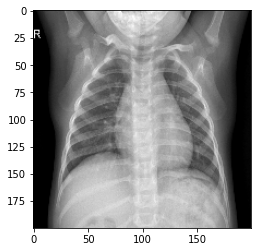

In [8]:
import cv2,pathlib
def resize_fn(fp: str) -> np.ndarray:
    """ Resize an image maintaining its proportions
    Args:
        fp (str): Path argument to image file
        scale (Union[float, int]): Percent as whole number of original image. eg. 53
    Returns:
        image (np.ndarray): Scaled image
    """    
    _scale = lambda dim, s: int(dim * s / 100)
    im: np.ndarray = cv2.imread(fp)
    #plt.imshow(im)
    width, height, channels = im.shape
    scale_1=(200*100)/width
    scale_2=(200*100)/height
    print("{},{},{}".format(width,height,channels))
    new_width: int = _scale(width, scale_1)
    new_height: int = _scale(height, scale_2)
    new_dim: tuple = (new_width, new_height)
    return cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)

resized = resize_fn("/content/drive/MyDrive/train (2)/NORMAL/IM-0119-0001.jpeg")
print(resized.shape)
plt.imshow(resized)

In [ ]:
'''from tqdm import tqdm
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    print(norm_files)
    norm_images = []
    for image in tqdm(norm_files):
        path = pathlib.Path(norm_path+image)
        full_path = path.absolute()
        my_path = full_path.as_posix()
        img=cv2.imread(str(my_path))
        plt.imshow(img)
        image = resize_fn(str(my_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels
def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array(['pneumonia']*len(pneu_files))
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = resize_fn(norm_path + image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels'''

In [ ]:
'''norm_images, norm_labels = load_normal('/content/drive/MyDrive/train (2)/NORMAL')
pneu_images, pneu_labels = load_pneumonia('/content/drive/MyDrive/train (2)/PNEUMONIA')'''

In [ ]:
'''model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()'''

In [9]:
from keras import regularizers
inputs = tf.keras.layers.Input((200,200,3))
s = tf.keras.layers.Lambda(lambda x: x/ 255)(inputs)

c1=tf.keras.layers.Conv2D(16, (3, 3),activation='relu')(s)
p1 = tf.keras.layers.MaxPooling2D(2, 2)(c1)

c2=tf.keras.layers.Conv2D(32, (3, 3),activation='relu')(p1)
p2 = tf.keras.layers.MaxPooling2D(2,2)(c2)

c3=tf.keras.layers.Conv2D(64, (3, 3),activation='relu')(p2)
p3 = tf.keras.layers.MaxPooling2D(2,2)(c3)

c4=tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(p3)
p4 = tf.keras.layers.MaxPooling2D(2,2)(c4)

c5=tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(p4)
p5 = tf.keras.layers.MaxPooling2D(2,2)(c5)

c5=tf.keras.layers.Flatten()(p4)
c5=tf.keras.layers.Dense(512,activation='relu')(c5)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(c5)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [10]:
from tensorflow.keras.optimizers import RMSprop,Adam
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint('Pneumonia_classification.h5',
                             monitor='val_loss', 
                             mode='min',
                             save_best_only=True,
                             verbose=1)
callbacks = [checkpoint]
epochs=10
history = model.fit(x=train_generator,epochs = epochs,validation_data = validation_generator,callbacks=callbacks)

Epoch 1/10
33/33 [==============================] - 1602s 48s/step - loss: 0.5126 - accuracy: 0.7716 - val_loss: 0.3495 - val_accuracy: 0.8710

Epoch 00001: val_loss improved from inf to 0.34946, saving model to Pneumonia_classification.h5
Epoch 2/10
33/33 [==============================] - 46s 1s/step - loss: 0.2080 - accuracy: 0.9149 - val_loss: 0.3374 - val_accuracy: 0.8548

Epoch 00002: val_loss improved from 0.34946 to 0.33741, saving model to Pneumonia_classification.h5
Epoch 3/10
33/33 [==============================] - 45s 1s/step - loss: 0.1539 - accuracy: 0.9413 - val_loss: 0.5259 - val_accuracy: 0.7661

Epoch 00003: val_loss did not improve from 0.33741
Epoch 4/10
33/33 [==============================] - 45s 1s/step - loss: 0.1035 - accuracy: 0.9612 - val_loss: 0.7224 - val_accuracy: 0.7742

Epoch 00004: val_loss did not improve from 0.33741
Epoch 5/10
33/33 [==============================] - 45s 1s/step - loss: 0.0849 - accuracy: 0.9655 - val_loss: 0.9646 - val_accuracy: 0.

In [12]:
test_datagen = ImageDataGenerator()

In [13]:
test_generator = test_datagen.flow_from_directory( directory = test_data_dir,
                                                              target_size = (img_rows,img_cols),
                                                              batch_size = 64,
                                                              class_mode = "binary",
                                                             )

Found 624 images belonging to 2 classes.


(712, 936, 3)
712,936,3
(200, 200, 3)


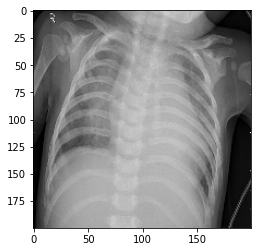

In [15]:
img=cv2.imread('/content/drive/MyDrive/test (2)/PNEUMONIA (1)/person112_bacteria_539.jpeg')
print(img.shape)
resized = resize_fn('/content/drive/MyDrive/test (2)/PNEUMONIA (1)/person112_bacteria_539.jpeg')
print(resized.shape)
plt.imshow(resized)
image = resized.reshape((200,200,3))

In [16]:
X = np.zeros((1,200,200, 3), dtype=np.float32)
X[0]=image
model.predict(X)

array([[0.9997124]], dtype=float32)

(1443, 1852, 3)
1443,1852,3
(200, 200, 3)


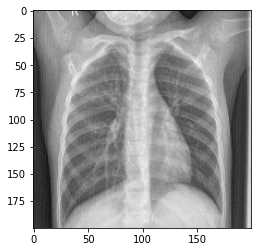

In [17]:
img=cv2.imread('/content/drive/MyDrive/test (2)/NORMAL (1)/IM-0009-0001 (1).jpeg')
print(img.shape)
resized = resize_fn('/content/drive/MyDrive/test (2)/NORMAL (1)/IM-0009-0001 (1).jpeg')
print(resized.shape)
plt.imshow(resized)
image = resized.reshape((200,200,3))

In [18]:
X = np.zeros((1,200,200, 3), dtype=np.float32)
X[0]=image
model.predict(X)

array([[0.25158626]], dtype=float32)

In [19]:
model.save('Pneumonia_weights.h5')

(1443, 1852, 3)
1443,1852,3
(200, 200, 3)


array([[0.25158626]], dtype=float32)

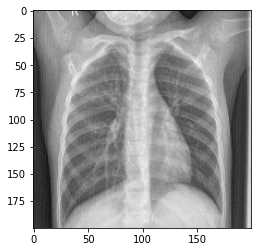

In [20]:
from keras.models import load_model
model_n = load_model('/content/Pneumonia_weights.h5')
img=cv2.imread('/content/drive/MyDrive/test (2)/NORMAL (1)/IM-0009-0001 (1).jpeg')
print(img.shape)
resized = resize_fn('/content/drive/MyDrive/test (2)/NORMAL (1)/IM-0009-0001 (1).jpeg')
print(resized.shape)
plt.imshow(resized)
image = resized.reshape((200,200,3))
X = np.zeros((1,200,200, 3), dtype=np.float32)
X[0]=image
model_n.predict(X)

(1443, 1852, 3)
1443,1852,3
(200, 200, 3)


array([[0.15807015]], dtype=float32)

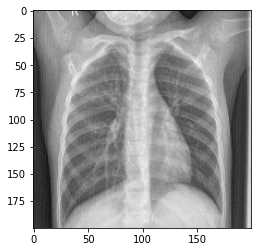

In [21]:
from keras.models import load_model
model_n = load_model('/content/Pneumonia_classification.h5')
img=cv2.imread('/content/drive/MyDrive/test (2)/NORMAL (1)/IM-0009-0001 (1).jpeg')
print(img.shape)
resized = resize_fn('/content/drive/MyDrive/test (2)/NORMAL (1)/IM-0009-0001 (1).jpeg')
print(resized.shape)
plt.imshow(resized)
image = resized.reshape((200,200,3))
X = np.zeros((1,200,200, 3), dtype=np.float32)
X[0]=image
model_n.predict(X)